In [1]:
import pandas as pd
import numpy as np
import nltk
import future
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords 

In [2]:
def label_data():
    rows = pd.read_csv('desktop/Amazon_Unlocked_Mobile.csv', header=0, index_col=False, delimiter=',')
    labels = []
    for cell in rows['Rating']:
        if cell >= 4:
            labels.append('2')   #Good
        elif cell == 3:
            labels.append('1')   #Neutral
        else:
            labels.append('0')   #Poor
            
    rows['Label'] = labels
    del rows['Review Votes']
    return rows

In [3]:
def clean_data(data):
    #columnwise print number of rows containing blank values
    #print data.isnull().sum()
    
    #replace blank values in all the cells with 'nan'
    data.replace('',np.nan,inplace=True)
    #delete all the rows which contain at least one cell with nan value
    data.dropna(axis=0, how='any', inplace=True)
    
    #Check the number of rows containing blank values. This should be zero now as compared to first line of this function
    #print data.isnull().sum()
    #save output csv file
    data.to_csv('labelled_dataset.csv', index=False)
    return data

In [4]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
#         stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [5]:
def modelEvaluation(predictions, y_test_set):
    #Print model evaluation to predicted result 
    
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    #print "\nAUC score : {:.4f}".format(roc_auc_score(y_test_set, predictions))
    print ("\nClassification report : \n", metrics.classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test_set, predictions))

In [6]:
if __name__ == '__main__':
    data = label_data()
    data = clean_data(data)
    #prints first 5 rows of the dataset
    print (data.head())

                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews Label  
0       5  I feel so LUCKY to have found this used (phone...     2  
1       4  nice phone, nice up grade from my pantach revu...     2  
2       5                                       Very pleased     2  
3       4  It works good but it goes slow sometimes but i...     2  
4       4  Great phone to replace my lost phone. The only...     2  


Text(0, 0.5, 'Count')

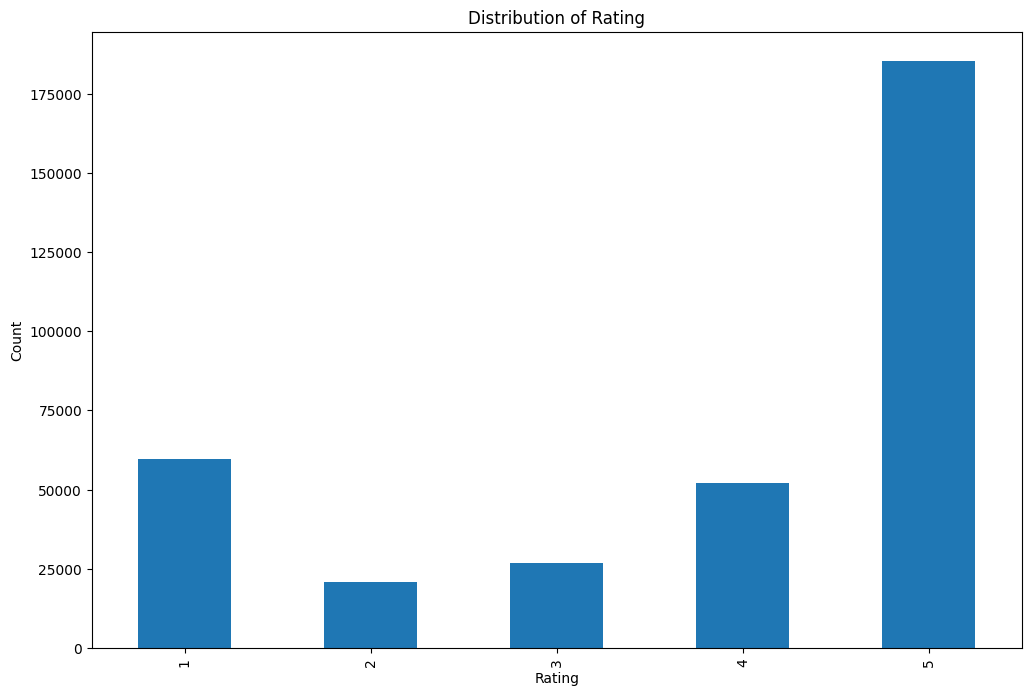

In [7]:
    # Plot distribution of rating
    plt.figure(figsize=(12,8))
    # sns.countplot(data['Rating'])
    data['Rating'].value_counts().sort_index().plot(kind='bar')
    plt.title('Distribution of Rating')
    plt.xlabel('Rating')
    plt.ylabel('Count')

Text(0.5, 1.0, 'Number of Reviews for Top 20 Brands')

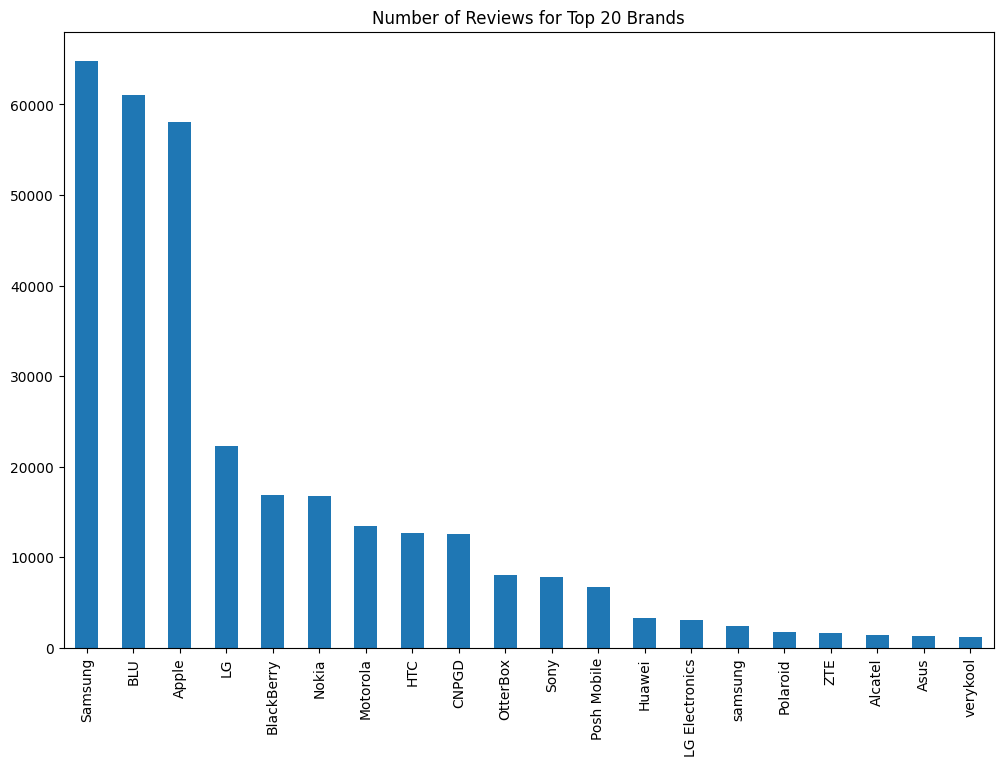

In [8]:
    # Plot number of reviews for top 20 brands
    brands = data["Brand Name"].value_counts()
    # brands.count()
    plt.figure(figsize=(12,8))
    brands[:20].plot(kind='bar')
    plt.title("Number of Reviews for Top 20 Brands")

Text(0.5, 1.0, 'Number of Reviews for Top 50 Products')

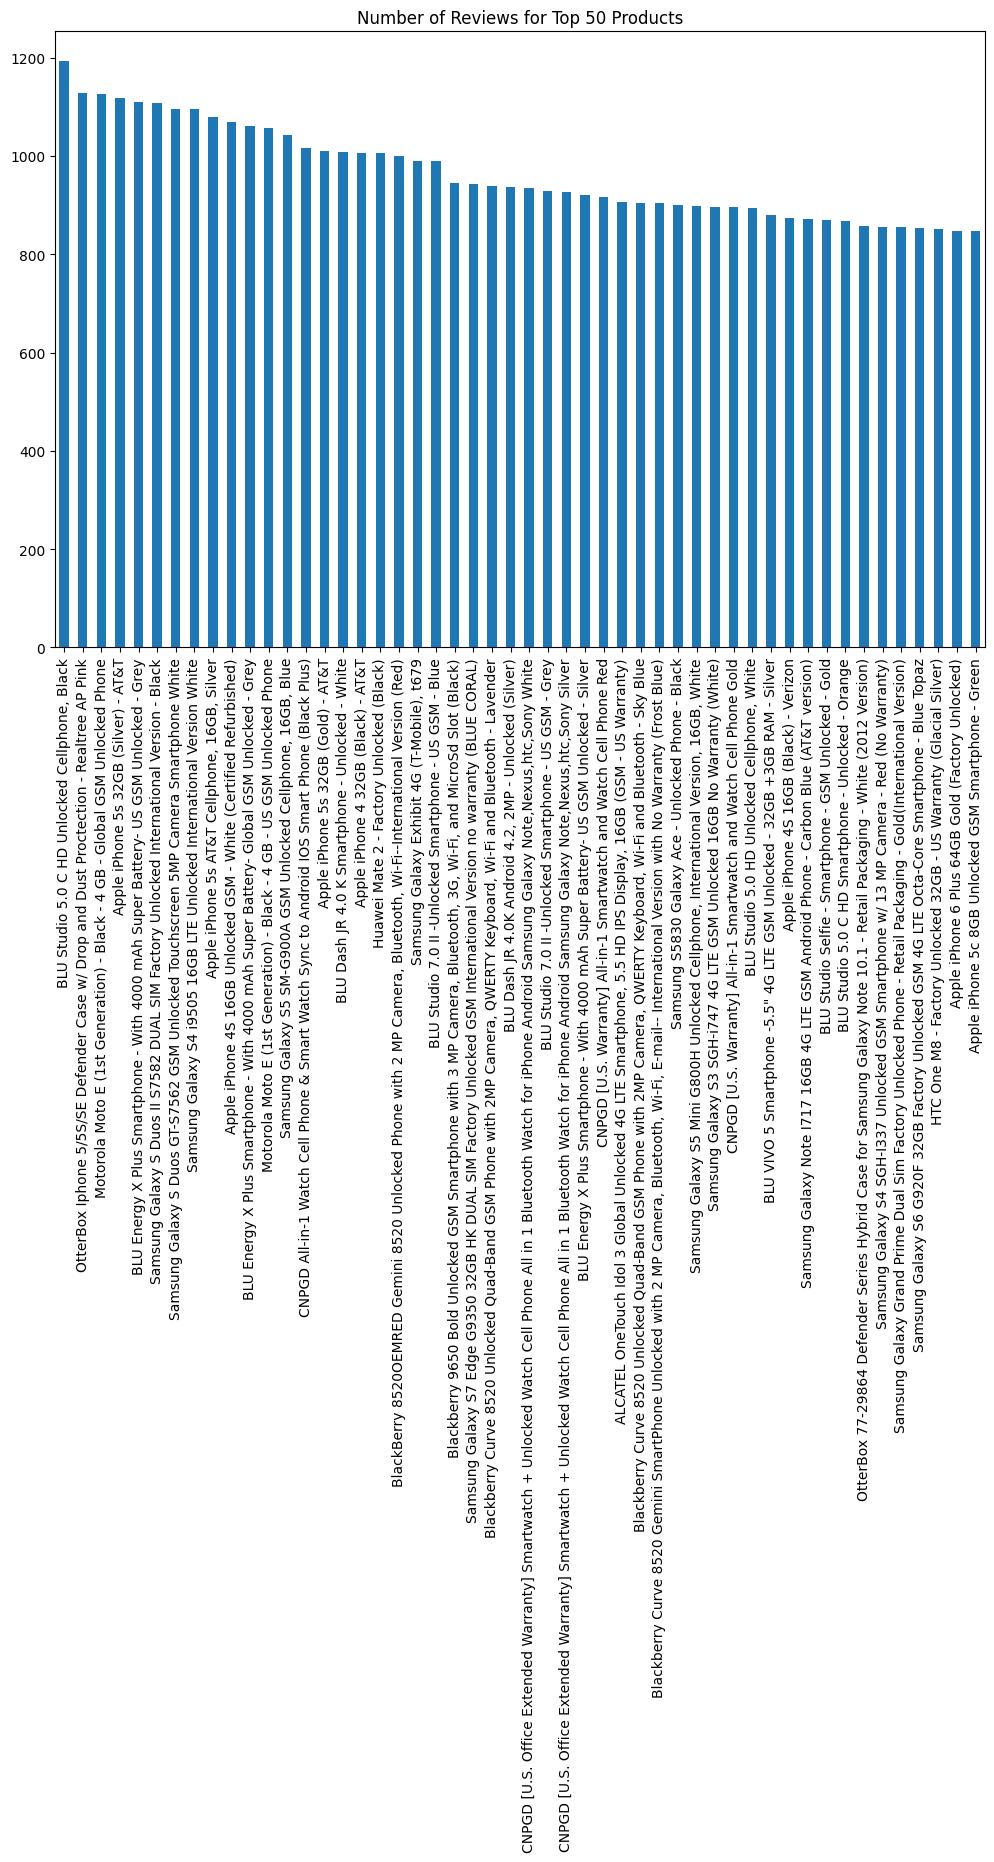

In [9]:
    # Plot number of reviews for top 50 products
    products = data["Product Name"].value_counts()
    plt.figure(figsize=(12,8))
    products[:50].plot(kind='bar')
    plt.title("Number of Reviews for Top 50 Products")

Text(0, 0.5, 'Count')

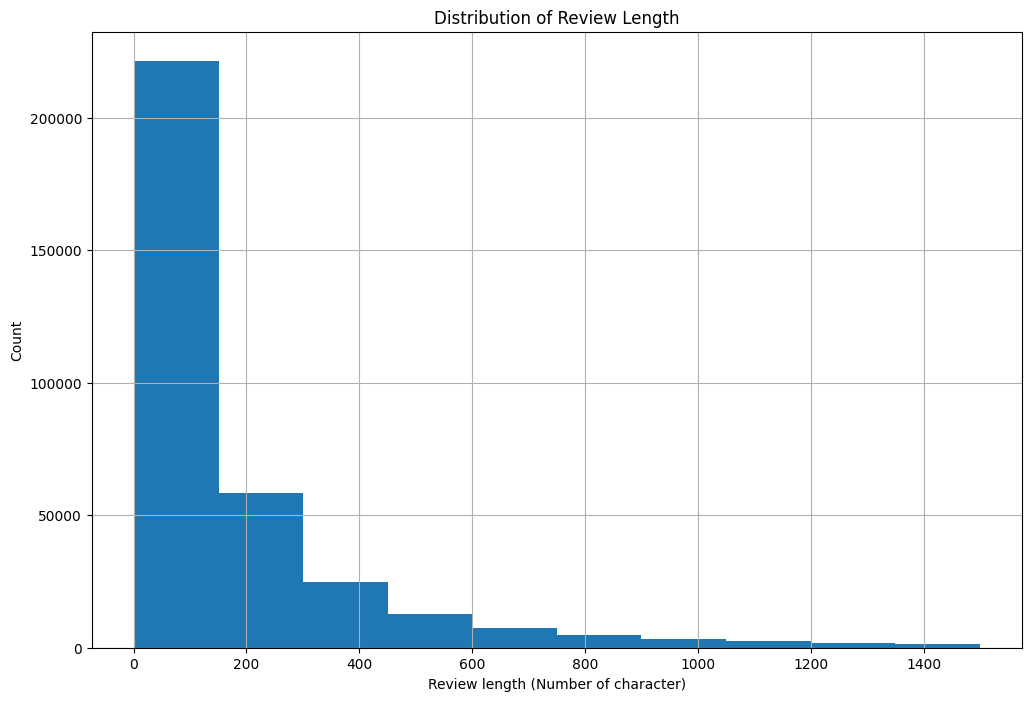

In [10]:
    # Plot distribution of review length
    review_length = data["Reviews"].dropna().map(lambda x: len(x))
    plt.figure(figsize=(12,8))
    review_length.loc[review_length < 1500].hist()
    plt.title("Distribution of Review Length")
    plt.xlabel('Review length (Number of character)')
    plt.ylabel('Count')

In [11]:
    #split data into training and testing set
    x_train, x_test, y_train, y_test = train_test_split(data['Reviews'], data['Label'], test_size=0.1, random_state=0)
    
    
    #If the label are words instead of numbers, they can be replaced programmatically using following two lines
    #y_train = label_binarize(y_train, classes=[0, 1, 2])
    #y_test = label_binarize(y_test, classes=[0, 1, 2])

In [12]:
    # Preprocess text data in training set and validation set
    x_train_cleaned = []
    x_test_cleaned = []

    for d in x_train:
        x_train_cleaned.append(cleanText(d))

    for d in x_test:
        x_test_cleaned.append(cleanText(d))   

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [13]:
    countVect = CountVectorizer() 
    x_train_countVect = countVect.fit_transform(x_train_cleaned)
    print ("Number of features : %d \n" %len(countVect.get_feature_names_out())) #6378 
    print ("Show some feature names : \n", countVect.get_feature_names_out()[::1000])

Number of features : 54179 

Show some feature names : 
 ['aa' 'aerial' 'andcamera' 'ascetically' 'baggie' 'bird' 'broadcasted'
 'cannonball' 'chepo' 'commenced' 'consumidores' 'crummy' 'deffinitly'
 'diferente' 'donesuper' 'elecion' 'espected' 'expirence' 'finds'
 'friendf' 'girlfriend' 'guerrero' 'hhapoy' 'iki' 'instade' 'iwas'
 'labelled' 'lit' 'manejo' 'microseconds' 'movida' 'nicedisadvantages'
 'offfer' 'outputaverage' 'percato' 'pjones' 'preorder' 'provideds'
 'ravages' 'refuseing' 'restaurants' 'sales' 'semana' 'simplier'
 'solicitado' 'stares' 'supercharge' 'telefenos' 'tico' 'tribute' 'unike'
 'valuegreat' 'wants' 'withs' 'ytrade']


In [14]:
    # Train MultinomialNB classifier
    mnb = MultinomialNB()
    mnb.fit(x_train_countVect, y_train)

MultinomialNB()

In [15]:
    # Evaluate the model on validaton set
    predictions = mnb.predict(countVect.transform(x_test_cleaned))
    modelEvaluation(predictions, y_test)


Accuracy on validation set: 0.8552

Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      8138
           1       0.45      0.27      0.33      2736
           2       0.90      0.94      0.92     23577

    accuracy                           0.86     34451
   macro avg       0.72      0.67      0.69     34451
weighted avg       0.84      0.86      0.85     34451


Confusion Matrix : 
 [[ 6594   371  1173]
 [  770   727  1239]
 [  927   508 22142]]


In [16]:
    # Fit and transform the training data to a document-term matrix using TfidfVectorizer 
    tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
    x_train_tfidf = tfidf.fit_transform(x_train)
    print ("Number of features : %d \n" %len(tfidf.get_feature_names_out())) #1722
    print ("Show some feature names : \n", tfidf.get_feature_names_out()[::1000])

    # Logistic Regression
    lr = LogisticRegression()
    lr.fit(x_train_tfidf, y_train)

Number of features : 21131 

Show some feature names : 
 ['00' '9100' 'appearence' 'blinding' 'choked' 'cracked' 'directo' 'eq'
 'floored' 'guidebook' 'indiscernible' 'leads' 'miami' 'occupied' 'pig'
 'quedo' 'reviewedblackberry' 'shutting' 'studies' 'tmob' 'varies' 'youll']


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
    # Look at the top 10 features with smallest and the largest coefficients
    feature_names = np.array(tfidf.get_feature_names_out())
    sorted_coef_index = lr.coef_[0].argsort()
    print ("Total number of features = " + str(len(sorted_coef_index)))
    print ('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
    print ('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Total number of features = 21131

Top 10 features with smallest coefficients :
['great' 'love' 'amazing' 'excellent' 'perfect' 'perfectly' 'loves'
 'awesome' 'far' 'easy']

Top 10 features with largest coefficients : 
['worst' 'junk' 'not' 'useless' 'waste' 'unusable' 'garbage' 'worthless'
 'dissatisfied' 'horrible']


In [18]:
    # Evaluate on the validaton set
    predictions = lr.predict(tfidf.transform(x_test_cleaned))
    modelEvaluation(predictions, y_test)


Accuracy on validation set: 0.8842

Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      8138
           1       0.61      0.24      0.35      2736
           2       0.92      0.96      0.94     23577

    accuracy                           0.88     34451
   macro avg       0.78      0.69      0.71     34451
weighted avg       0.87      0.88      0.87     34451


Confusion Matrix : 
 [[ 7091   189   858]
 [  827   662  1247]
 [  632   238 22707]]


In [19]:
    #x_train_subset = tfidf.transform(x_train_cleaned[:100])
    x_train_input = tfidf.transform(x_train_cleaned)
    svr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)
    svr_lin.fit(x_train_input, y_train)
    y_svr_lin_predicted = svr_lin.predict(tfidf.transform(x_test_cleaned))

In [20]:
    modelEvaluation(y_svr_lin_predicted, y_test)


Accuracy on validation set: 0.8916

Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      8138
           1       0.74      0.25      0.37      2736
           2       0.92      0.97      0.94     23577

    accuracy                           0.89     34451
   macro avg       0.83      0.70      0.72     34451
weighted avg       0.88      0.89      0.88     34451


Confusion Matrix : 
 [[ 7219   113   806]
 [  849   675  1212]
 [  623   130 22824]]


In [21]:
    print ("Accuracy of this SVM = " + str(metrics.accuracy_score(y_test, y_svr_lin_predicted)))
    print ("Fscore of this SVM = " + str(metrics.precision_recall_fscore_support(y_test, y_svr_lin_predicted, pos_label=2, average='weighted')))
    print ("F-1 score of this SVM = " + str(metrics.f1_score(y_test, y_svr_lin_predicted, pos_label=2, average='weighted')))
    print ("confusion matrix = " + str(metrics.confusion_matrix(y_test, y_svr_lin_predicted)))

Accuracy of this SVM = 0.8916432033903224


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Fscore of this SVM = (0.883376009398042, 0.8916432033903224, 0.8771971560656147, None)


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


F-1 score of this SVM = 0.8771971560656147
confusion matrix = [[ 7219   113   806]
 [  849   675  1212]
 [  623   130 22824]]


In [22]:
    decTree = DecisionTreeClassifier()
    decTree.fit(x_train_input, y_train)
    y_decTree_predicted = decTree.predict(tfidf.transform(x_test_cleaned))

In [23]:
   modelEvaluation(y_decTree_predicted, y_test)


Accuracy on validation set: 0.9261

Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      8138
           1       0.78      0.69      0.73      2736
           2       0.95      0.96      0.96     23577

    accuracy                           0.93     34451
   macro avg       0.87      0.85      0.86     34451
weighted avg       0.92      0.93      0.93     34451


Confusion Matrix : 
 [[ 7285   242   611]
 [  319  1901   516]
 [  549   308 22720]]


In [24]:
    print ("Accuracy of Decision Tree = " + str(decTree.score(tfidf.transform(x_test_cleaned), y_test)))
    print ("Fscore of this SVM = " + str(metrics.precision_recall_fscore_support(y_test, y_decTree_predicted, pos_label=2, average='weighted')))
    print ("F-1 score of this SVM = " + str(metrics.f1_score(y_test, y_decTree_predicted, pos_label=2, average='weighted')))
    print ("confusion matrix = " + str(metrics.confusion_matrix(y_test, y_decTree_predicted)))

Accuracy of Decision Tree = 0.9261269629328611


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Fscore of this SVM = (0.9246873404375002, 0.9261269629328611, 0.9252094462095897, None)


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


F-1 score of this SVM = 0.9252094462095897
confusion matrix = [[ 7285   242   611]
 [  319  1901   516]
 [  549   308 22720]]


In [25]:
    rand = RandomForestClassifier()
    rand.fit(x_train_input, y_train)
    y_rand_predicted = rand.predict(tfidf.transform(x_test_cleaned))

In [26]:
    modelEvaluation(y_rand_predicted, y_test)


Accuracy on validation set: 0.9494

Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      8138
           1       0.98      0.65      0.79      2736
           2       0.95      0.99      0.97     23577

    accuracy                           0.95     34451
   macro avg       0.96      0.86      0.90     34451
weighted avg       0.95      0.95      0.95     34451


Confusion Matrix : 
 [[ 7536    11   591]
 [  253  1788   695]
 [  176    18 23383]]


In [28]:
    print ("Accuracy of Random Forest = " + str(rand.score(tfidf.transform(x_test_cleaned), y_test)))
    print ("Fscore of this SVM = " + str(metrics.precision_recall_fscore_support(y_test, y_rand_predicted, pos_label=2, average='weighted')))
    print ("F-1 score of this SVM = " + str(metrics.f1_score(y_test, y_rand_predicted, pos_label=2, average='weighted')))
    print ("confusion matrix = " + str(metrics.confusion_matrix(y_test, y_rand_predicted)))

Accuracy of Random Forest = 0.9493773765638153
Fscore of this SVM = (0.9503335377189839, 0.9493773765638153, 0.9468407220977344, None)


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


F-1 score of this SVM = 0.9468407220977344
confusion matrix = [[ 7536    11   591]
 [  253  1788   695]
 [  176    18 23383]]
